# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> Práctico 7</center>      

In [1]:
# Se importan las bibliotecas que se utilizarán
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib notebook

## Objetivos

- Aplicar **k-vecinos** más cercanos para **clasificar** entre las 10 categorías de **dígitos**. Optimizar el parámetro *k* utilizando la biblioteca *scikit-learn*.
- Estimar **densidades** de probabilidad mediante el método de **ventanas de Parzen** y aplicarlo a un problema de clasificación. 
- Implementar el algoritmo de **clustering k-means** y aplicarlo en de datos sintéticos. Analizar su funcionamiento.   
- Realizar **agrupamiento de datos** mediante **mezcla de gaussianas**. Implementarlo utilizando el esquema **Expectation Maximization** para encontrar los parámetros. Comparar este agrupamiento con el de *k-means*.

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): *k-vecinos* más cercano       
[Ejercicio 2](#Ejercicio2): ventanas de Parzen   
[Ejercicio 3](#Ejercicio3): k-means   
[Ejercicio 4](#Ejercicio4): Mezcla de Gaussianas con EM   

In [2]:
# funciones auxiliares (Ejecutar y seguir)
def error_relativo(x, y):
    ''' devuelve el error relativo'''
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Ejercicio 1: vecino más cercano

En este ejercicio se utilizará *vecino más cercano* para clasificar la base de dígitos que viene con *scikit-learn*. La siguiente celda levanta los datos.

In [3]:
# se levantan los dígitos de la base MNIST 
mnist = load_digits()
print('La base de datos MNIST tiene %d dígitos' % len(mnist.data))

La base de datos MNIST tiene 1797 dígitos


In [4]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


**Parte a)** Particionar aleatoriamente los datos utilizando el 70\% de las muestras para entrenamiento, el 10\% para validación y 20\% para test.

In [5]:
np.random.seed(35)
############################################################################################
##########################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO  #########################
############################################################################################
X,y = mnist.data, mnist.target
N = len(X)
indices = np.random.permutation(N)

itrain = round(N * 0.7)
itest = itrain + round( N * 0.2)
ival = itest + round( N * 0.1)

#print(itrain, itest, ival)
#print(N)

X_train, y_train = X[:itrain], y[:itrain]
X_test, y_test = X[itrain:itest], y[itrain:itest]
X_val, y_val = X[itest:ival], y[itest:ival]

############################################################################################
##########################  TERMINA ESPACIO PARA COMPLETAR CODIGO  #########################
###########################################################################################
 
# Se muestra el tamaño de los conjuntos generados
print("El conjunto de entrenamiento tiene {} dígitos".format(len(y_train)))
print("El conjunto de validación tiene {} dígitos".format(len(y_val)))
print("El conjunto de test tiene {} dígitos".format(len(y_test)))

El conjunto de entrenamiento tiene 1258 dígitos
El conjunto de validación tiene 180 dígitos
El conjunto de test tiene 359 dígitos


**Parte b)** Se utilizará la clase `KNeighborsClassifier` de *scikit-learn* para encontrar un clasificador mediante el método de vecino más cercano. Para encontrar el valor óptimo de *k* se usará el error con el conjunto de validación. 

<IPython.core.display.Javascript object>


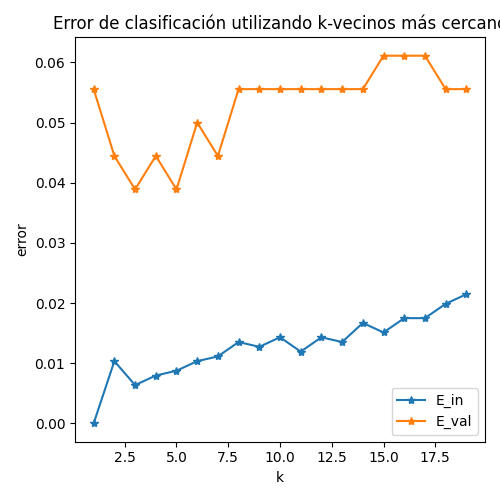

In [6]:
# se determina el rango de valores de k a probar 
rango_k = range(1, 20)
# se inicializan la listas que guardarán E_in y E_val 
E_in = []
E_val = []
 
for k in rango_k:
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    # se entrena el clasificador que usa k-vecinos
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    Model = neigh.fit(X_train,y_train)
 
    # se calculan y guardan E_in y E_val
    
    E_in_i = 1 - Model.score(X_train,y_train)
    E_val_i = 1 - Model.score(X_val,y_val)
    
    E_in.append(E_in_i)
    E_val.append(E_val_i)
    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################

plt.figure(figsize=(5,5))
plt.plot(rango_k, E_in,'*-', label='E_in')
plt.plot(rango_k, E_val,'*-', label='E_val')
plt.legend()
plt.xlabel('k')
plt.ylabel('error')
plt.title('Error de clasificación utilizando k-vecinos más cercano')
plt.tight_layout()

**Parte c)** ¿Cuál es el valor óptimo de *k* y el error con el conjunto de validación para dicho *k* ?

In [13]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# se encuentra el valor óptimo de k
k_opt = rango_k[np.argmin(E_val)]

# error con el conjunto de validación
e_val_opt = E_val[k_opt]

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

print('El valor óptimo de k es %d, el error con el conjunto de validación es %f' % (k_opt, e_val_opt))

El valor óptimo de k es 3, el error con el conjunto de validación es 0.044444


**Parte d)** Entrenar el clasificador óptimo y general las predicciones con el conjunto de test.

In [14]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# se entrena el clasificador óptimo
#knn_clf = KNeighborsClassifier(n_neighbors=k_opt).fit(X_train,y_train)

X_aux = np.vstack((X_train,X_val))
y_aux = np.hstack((y_train,y_val))

knn_clf = KNeighborsClassifier(n_neighbors=k_opt).fit(X_aux,y_aux)

# se generan las predicciones de test
y_test_pred = knn_clf.predict(X_test)

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################
print(confusion_matrix(y_test, y_test_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 37]]


**Parte e)** Una forma alternativa de estimar los parámetros óptimos es mediante *validación cruzada* con *5 folds*. Utilice la clase `GridSearchCV` de *scikit-learn* para estimar los parámetros óptimos. 

In [15]:
####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################
parameters = {'n_neighbors':rango_k}

knn_cv = GridSearchCV(KNeighborsClassifier(), parameters,cv=5)  # GridSearchCV para k-nn
knn_cv.fit(X_aux,y_aux)

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################
print('k optimo mediante cv = %f' % knn_cv.best_params_['n_neighbors'])
print('accuracy = %f' % knn_cv.best_score_)

k optimo mediante cv = 2.000000
accuracy = 0.961750


In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors']).fit(X_aux,y_aux)

# se generan las predicciones de test
y_test_pred = knn_clf.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  4  1  0  0  0  0  0 30  0]
 [ 0  0  0  2  0  0  0  0  0 35]]


**Parte f)** ¿Coinciden los valores óptimos encontrados? ¿Qué método le parece más adecuado para este problema en particular? 

**Respuesta:**  

Los valores óptimos no coinciden, para el problema en particular resulta mas adecuado el primer caso ya que la estimación del error fuera de la muestra es mejor utilizando esa forma de validación y por consiguiente se obtienen resultados levemente mejores como se observa al comparar las matrices de confusion. 

**Parte g)** Dado el gran desempeño alcanzado por *k-nn* en la separación de dígitos, se merece una oportunidad en el problema de separación de sonidos urbanos del práctico anterior. Evalúelo y comente los resultados. 

## Ejercicio 2: ventanas de Parzen

En este ejercicio se utilizará la base de datos Iris para clasificación de flores disponible en *scikit learn*. Se considerará sólo el *largo* y el *ancho* del pétalo como características.

In [17]:
data = load_iris()
print(data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Parte a)** Construya el vector de características y las etiquetas que se utilizarán en este ejercicio.

In [18]:
features = [2,3] # se eligen dos características

####################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

# Vector de características en X
X = data['data'][:,features]
#print(X)
# se almacenan las etiquetas en el vector labels
labels = data['target']
#print(labels)

####################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
####################################################################################

A continuación se muestra la distribución de patrones para las tres clases presentes, cada
una de ellas con un color diferente.

<IPython.core.display.Javascript object>


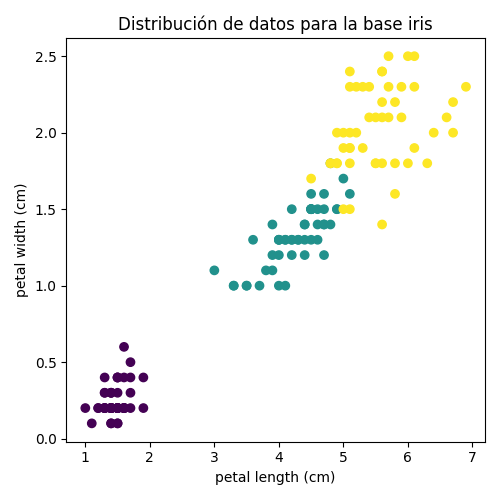

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=labels)
plt.xlabel(data['feature_names'][features[0]])
plt.ylabel(data['feature_names'][features[1]])
plt.title('Distribución de datos para la base iris')
plt.tight_layout()

Se desean estimar las densidades de cada clase utilizando el método de ventanas de Parzen con un *kernel* gaussiano de la forma: 

$$
K(\mathbf{x}, \mathbf{z_i})=\frac{1}{(2\pi)^{d/2}\vert \Sigma \vert^{1/2}} 
                               \exp ^{\left(-\frac{1}{2}\left( \mathbf{x} - \mathbf{z_i} \right)^T 
                                        \Sigma^{-1} \left( \mathbf{x} - \mathbf{z_i} \right) \right)}
$$

**Parte b)** Implementar el método `evaluar_kernel_gaussiano()`. Dicho método se utilizará para determinar la similitud entre la muestra a evaluar $\mathbf{x}$ y una muestra de entrenamiento $\mathbf{z_i}$ utilizando un *kernel gaussiano*. 

In [20]:
def evaluar_kernel_gaussiano(x, mu, Sigma):
    '''
    Entrada:
        x: vector a evaluar de dimensión (d,1)
        mu: media del núcleo gaussiano de dimensión (d,1)
        Sigma: covarianza del núcleo gaussiano de dimensión (d,d)
    Salida:
        p: resultado de evaluar el kernel gaussiano
    '''
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    d= x.shape[0]


    x_mu = x - mu
    
    sig_inv = np.linalg.inv(Sigma)
    sig_nor = np.sqrt(np.linalg.det(Sigma))
    
    p = np.exp(-0.5*x_mu.T@sig_inv@x_mu)/(((2*np.pi)**(d/2))*np.sqrt(np.linalg.det(Sigma)))
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    p = np.squeeze(p) # para asegurar que la salida es un escalar
    return p

In [21]:
# Se testea evaluar_kernel_gaussiano() 

np.random.seed(33)
d=5
x_ = np.random.randn(d,1)
mu_= np.random.randn(d,1)
Sigma_ = np.random.randn(d,d)
Sigma_ = Sigma_ @ Sigma_.T  # para que sea semidefinida positiva

p = evaluar_kernel_gaussiano(x_, mu_, Sigma_)

p_correcto = 2.29350214e-07
# Se compara la salida con la nuestra. El error debería ser menor a e-9
print('Testeando la función evaluar_kernel_gaussiano()')
print('Diferencia: ', error_relativo(p, p_correcto))

Testeando la función evaluar_kernel_gaussiano()
Diferencia:  2.6017085733100554e-10


**Parte c)** Implementar el método `estimar_densidad()` que evalúa, en un conjunto de puntos X, la densidad de probabilidad de pertenecer a una clase. La densidad se estima mediante el método de ventanas de Parzen utilizando los patrones de entrenamiento de dicha clase.

In [22]:
def estimar_densidad(X, Z, Sigma):
    '''
    Utiliza los patrones de entrenamiento Z pertenecientes a una misma clase, para 
    evaluar la densidad de probabilidad de dicha clase en los puntos pasados en X. 
    La densidad se estima mediante el método de ventanas de Parzen con núcleo gaussiano.   
    Entrada:
        X: matriz de tamaño Nxd que contiene los puntos en donde se quiere 
           evaluar la densidad
        Z: matriz de tamaño Mxd que contiene los puntos de entrenamiento
        Sigma: matriz de covarianza del kernel gaussiano
    Salida:
        densidades: vector de tamaño N que almacena la densidad en los puntos evaluados
    '''
    
    N, d = X.shape
    M, d = Z.shape
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    densidades = np.zeros((N))
    
    for i in range(N):
        for j in range(M):
            densidades[i] += evaluar_kernel_gaussiano(X[i], Z[j], Sigma)
            
    densidades = densidades/M
    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################
    
    return densidades

In [23]:
# Se testea estimar_densidad() 
np.random.seed(45)
N=4; M=6
d=3
X_ = np.random.randn(N,d)
Z_=  np.random.randn(M,d)
Sigma_ = np.random.randn(d,d)
Sigma_ = Sigma_ @ Sigma_.T  # para que sea semidefinida positiva

densidades = estimar_densidad(X_, Z_, Sigma_)
densidades_correctas = np.array([5.98438614e-02, 0, 4.83415432e-02, 1.86978536e-20])
# Se compara la salida con la nuestra. El error debería ser menor a e-9
print('Testeando la función evaluar_kernel_gaussiano()')
print('Diferencia: ', error_relativo(densidades, densidades_correctas))

Testeando la función evaluar_kernel_gaussiano()
Diferencia:  1.5985546902219234e-10


**Parte d)** Se estimará la densidad de cada una de las clases de la base Iris en una grilla de 50x50 puntos.
Se considerará para la estimación de las densidades una matriz $\Sigma$ de la forma $\Sigma=r^2 \Sigma_c$ siendo $\Sigma_c$ la matriz de covarianza de los datos pretenecientes a la clase y $r$ el parámetro que controla el ancho del *núcleo gaussiano*. 

<IPython.core.display.Javascript object>


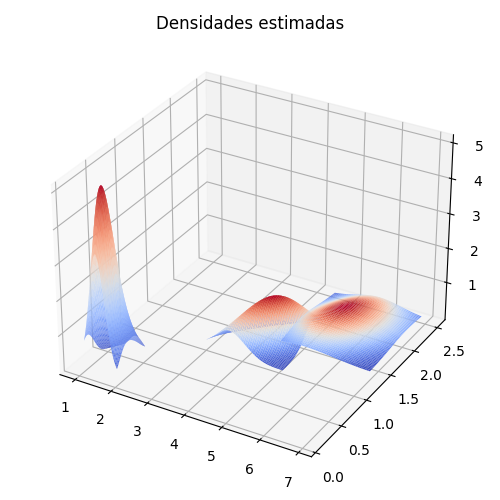

/tmp/ipykernel_10690/3729869577.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<IPython.core.display.Javascript object>


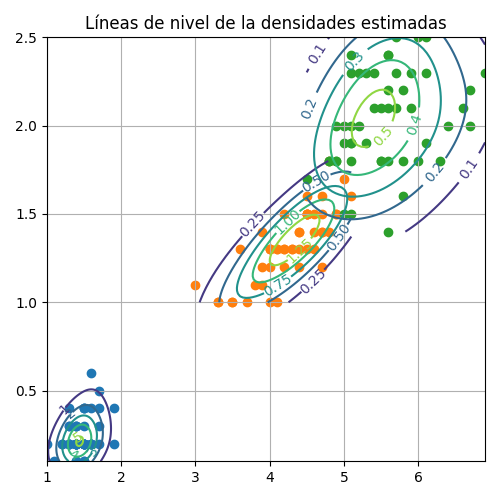

In [24]:
from mpl_toolkits.mplot3d import Axes3D

r=1 # ancho del núcleo gaussiano

for c in range(3):  # para cada una de las clases
    
    # se crea la grilla de 50x50 puntos que cubre el dominio de los puntos de la clase
    x = np.linspace(X[labels==c,0].min(), X[labels==c,0].max())
    y = np.linspace(X[labels==c,1].min(), X[labels==c,1].max())
    xx, yy = np.meshgrid(x, y)
    
    ####################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################    
    
    # Se calculan las densidades en los puntos de la grilla. 
    # el arreglo 'densidades' tiene que tener las mismas dimensiones que xx e yy 
    # Se sugiere:
    #    1. agrupar los puntos de la grilla convenientemente para calcular las densidades. 
    #       Para calcular las densidades puede ser útil np.cov() y verificar que las dimensiones
    #       de Sigma son las correctas.
    #    2. redimensionar las densidades calculadas de forma que coincidan con las de xx e yy  
    # 
    
    Sigma = (r**2)*np.cov(X[labels==c], rowvar = False)
    
    Z = X[labels==c,:]
    
    xx_f = xx.flatten()
    yy_f = yy.flatten()
    
    grilla = np.hstack((xx_f.reshape((-1,1)),yy_f.reshape((-1,1))))
    
    densidades = estimar_densidad(grilla, Z, Sigma).reshape(xx.shape)
    
    ####################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CODIGO ###########################
    ####################################################################################    

    fig = plt.figure(num='surface', figsize=(5,5)) 
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, densidades, rstride=1, cstride=1, 
                           cmap= plt.cm.coolwarm)

    
    plt.figure(num='contour', figsize=(5,5))
    plt.scatter(X[labels==c,0],X[labels==c,1])
    cs = plt.contour(xx, yy, densidades, levels=5)
    plt.clabel(cs, inline=1, fontsize=10)

fig = plt.figure(num='surface', figsize=(5,5)) 
plt.title('Densidades estimadas')
plt.tight_layout()    
plt.figure(num='contour', figsize=(5,5))
plt.grid()
plt.title('Líneas de nivel de la densidades estimadas')
plt.tight_layout()

**Parte e)** Comente sobre la influencia del ancho de banda *r*  en las densidades estimadas y establezca un rango de valores razonable. Proponga un mecanismo para determinarlo automáticamente, esto es especialmente útil en aquellos casos en que no es posible visualizar las densidades resultantes.

**Respuesta:**    
...

<a id="Ejercicio3"></a>
## Ejercicio 3: k-means

En este ejercicio se verá k-means como técnica de agrupamiento de datos.

**Parte a)** Completar la implementación del algoritmo k-means.

In [35]:
from sklearn.metrics import pairwise_distances

def k_means(X, k, metric='l2' ,semilla=43):    
    '''
    Entrada:
        X - arreglo de tamaño (N,d) que contiene los vectores de entrada
        k - numero de clusters a encontrar
        semilla - semilla que se usa para inicializar los centros.
                  Elegir aleatoriamente k vectores de X
    Salida:
        centros: arreglo de tamaño (N,d) que contiene los centros de los 
                 clusters encontrados
        etiquetas: vector de largo N que contiene los clusters 
                   a los que se asignaron las muestras  
    '''
    
    np.random.seed(semilla)
    
    convergio = False  
    n_iter = 0
    ###########################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    # Se inicializan los centros de los clusters a muestras elegidas 
    # aleatoriamente 
    N,d = X.shape
    
    #centros = np.random.rand(k,d) 
    centros =  np.random.permutation(X)[:k,:]

    centros_nuevos = np.zeros((k,d))
    
    etiquetas = np.zeros(N)
    
    distance = np.zeros((N,k))
    
    while not convergio:
        
        # 1. Se asignan las etiquetas al cluster cuyo centro es el más cercano. 
        # Se sugiere usar pairwise_distances del paquete metrics de sklearn 
        
        distance_anterior = distance
        distance = pairwise_distances(X,centros, metric)
        etiquetas[:] = np.argmin(distance,axis=1) 
        
        # 2. Se calculan los nuevos centros
                
        for i in range(k):
            centros_nuevos[i] = np.mean(X[etiquetas == i], axis = 0)

        # 3. Se evalúa la condición de convergencia (que los centros no cambien)
        if n_iter > 1:
            convergio = np.all(distance == distance_anterior)
        
        # 4. Se actualiza la variable centros y se aumenta el número de iteración
        centros = centros_nuevos
        n_iter += 1 

    
    ###########################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    print('El algoritmo finalizó en la iter %d' % n_iter)
    
    return centros, etiquetas   

**Parte b)** Aplicarlo al conjunto de datos del archivo `data/data_4clusters.npz`. La variable `X` contiene los patrones a agrupar. En este caso el número de clusters es 4.

(500, 2)
El algoritmo finalizó en la iter 12


<IPython.core.display.Javascript object>


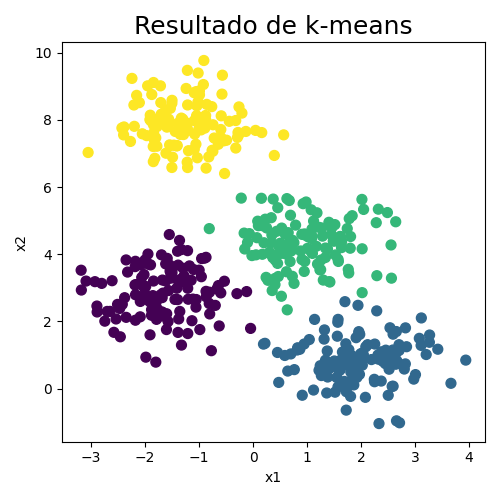

In [26]:
f = np.load('data/data_4clusters.npz')
X = f['X']
y = f['y']
print(X.shape)

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

centros, asignaciones = k_means(X, 4)

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

dot_size = 50
cmap = 'viridis'
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1], c=asignaciones, s=dot_size, cmap=cmap)
plt.title('Resultado de k-means', fontsize=18)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()

**Parte c)** Verificar el correcto funcionamiento del algoritmo comparando los resultados obtenidos con los de la variable `y`. Para ello usar algunas de las [métricas](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) disponibles en *scikit-learn*. 

In [27]:
from sklearn import metrics
N,d = X.shape

# adj_rand_score = 
adj_mi_score = metrics.adjusted_rand_score(y, asignaciones)

#print(y)
#print(asignaciones)
print(adj_mi_score)

0.989333319455347


**Parte d)** Al variar el valor de la semilla que controla la inicialización ¿Siempre obtuvo resultados satisfactorios? En caso negativo, proponga un esquema para robustecer el método.

In [28]:
centros, asignaciones = k_means(X, 4, semilla=43) 
adj_mi_score = metrics.adjusted_rand_score(y, asignaciones)
print(adj_mi_score)

centros, asignaciones = k_means(X, 4, semilla=53) 
adj_mi_score = metrics.adjusted_rand_score(y, asignaciones)
print(adj_mi_score)

centros, asignaciones = k_means(X, 4, semilla=42) 
adj_mi_score = metrics.adjusted_rand_score(y, asignaciones)
print(adj_mi_score)

centros, asignaciones = k_means(X, 4, semilla=47) 
adj_mi_score = metrics.adjusted_rand_score(y, asignaciones)
print(adj_mi_score)

El algoritmo finalizó en la iter 12
0.989333319455347
El algoritmo finalizó en la iter 7
0.989333319455347
El algoritmo finalizó en la iter 5
0.9946559286607272
El algoritmo finalizó en la iter 4
0.9946559286607272


**Respuesta:**    
...

**Parte e)** Utilice el algoritmo k-means para separar el conjunto de datos `data_4clusters_stretched` y comente los resultados.

El algoritmo finalizó en la iter 8


<IPython.core.display.Javascript object>


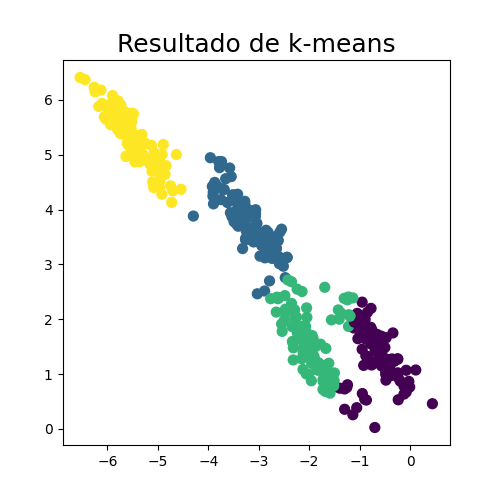

Text(0.5, 1.0, 'Resultado de k-means')

In [29]:
f=np.load('data/data_4clusters_stretched.npz')
f.files
X_st = f['X_st']
y_st = f['y_st']

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

centros_stretched, asignaciones_stretched = k_means(X_st, 4, metric='l2')

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_st[:, 0], X_st[:, 1], c=asignaciones_stretched, s=dot_size, cmap=cmap)
plt.title('Resultado de k-means', fontsize=18)


**Respuesta:**   

El algoritmo de k-means no logra clasificar correctamente los grupos dado que no se observan clusters bien definidos ademas que su topologia es particular. 

<a id="Ejercicio4"></a>
## Ejercicio 4: EM

El objetivo de este ejercicio es implementar el esquema Expectation Maximization (EM) para encontrar los parámetros que maximizan la verosimilitud del modelo Mezcla de Gaussianas para un conjunto de datos $X$. Si se utilizan $\textit{K}$ componentes en la mezcla, el modelo está dado por:

$$
p(\mathbf{x_n|\Theta})=\sum_{j=1}^K w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)
$$

Se implementará una función que utiliza el esquema EM para encontrar los parámetros óptimos en el caso de Mezcla de Gaussianas. Dentro de la función el esquema sigue los siguientes pasos:

1. Inicialización
2. Loop donde se calculan:
    - *Expectation Step* 
    - *Maximization Step*  
    - log verosimilitud de los datos
    - se evalúa condición de continuidad en el loop


**Parte a)** Implementar la función `inicializar_mezcla()` que es la encargada de inicializar las medias $\mathbf{\mu_j}$, las covarianzas $\mathbf{\Sigma_j}$ y los coeficientes $\mathbf{w}$ de la mezcla . Para facilitar la comparación con el algoritmo *k-means* del ejercicio anterior se sugiere inicializar los $\mathbf{\mu_j}$ a $\textit{k}$ vectores de $X$ elegidos aleatoriamente. 

In [36]:
def inicializar_mezcla(X, k, semilla):
    '''
    Entrada:
        X: matriz de tamaño (N,d) que contiene N muestras, una por fila
        k: número de clusters a encontrar
    Salida:
        w: arreglo de largo k que contiene los pesos de la mezcla. 
           Se deben inicializar a valores aleatorios cuya suma da 1 
        mus: arreglo de tamaño (k,d) que contiene los pesos
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza de los clusters
    '''
    N, d = X.shape
    
    # la semilla controla la inicialización de los parámetros
    np.random.seed(semilla)
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################

    # se inicializan los mus eligiendo k vectores al azar
    #mus = np.random.uniform(low=0, high=10, size=(k,d)) 
    mus =  np.random.permutation(X)[:k,:]

    # los sigmas se inicializan a la identidad
    sigmas = np.zeros((k,d,d))
    sigmas[:] = np.eye(d, dtype=int)
    
    # se inicializan el vector de pesos
    
    w = np.random.uniform(low=0, high=10, size=k)
    w_sum = np.sum(w)
    
    w[:] = w[:]/w_sum
    
    ########################################################################################
    ##################    TERMINAA ESPACIO PARA COMPLETAR CODIGO   #########################
    ########################################################################################
    
    return w, mus, sigmas

In [37]:
# Se testea inicializar_mezcla() 
N=7; d=2; k=2
X_ = np.random.randn(N,d)
semilla = 43
w, mus, sigmas = inicializar_mezcla(X, k, semilla)

sigmas_correctos = np.array([[[1., 0.], [0., 1.]], [[1., 0.], [0., 1.]]])

print('Testeando la función inicializar_mezcla()')
assert np.sum(w)==1, 'La suma de los w debe dar 1'
assert np.min(w)>=0, 'Los w deben ser positivos o cero'
assert mus.shape == (k,d), 'El tamaño de la matriz de mus no es correcto'
for j in range(k):
    assert np.allclose(sigmas[j], np.eye(len(sigmas[j]))), 'Los sigmas deben inicializarse a la identidad'


Testeando la función inicializar_mezcla()


**Parte b)** Implementar `expectation_step`. Se calcula la probabilidad de que la *n-ésima* muestra haya sido generada por la componente *j-ésima* de la mezcla. Para ello se utilizan los parámetros actuales   

$$
\gamma_{nj} = \frac{w_j \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_j},\mathbf{\Sigma_j} \right)}{\sum_{l=1}^{L} w_l \mathcal{N}\left( \mathbf{x_n} \vert \mathbf{\mu_l},\mathbf{\Sigma_l} \right)} 
$$

In [38]:
def expectation_step(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar
        w: vector de largo k que contiene los pesos de la mezcla. 
        mus: arreglo de tamaño (k,d) que contiene las k medias
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza de los clusters
    Salida:
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a cada cluster
    '''
    

    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    N,d = X.shape
    k = len(w)
    gammas = np.zeros((N,k))
    
    for i in range(N):
        for j in range (k):
            x = X[i] 
            mu = mus[j]
            Sigma = sigmas[j]
            gammas[i,j] = w[j]*evaluar_kernel_gaussiano(x, mu, Sigma)
        
        gammas[i] = gammas[i]/np.sum(gammas[i])
        
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    return gammas

In [39]:
# Se testea expectation_step() 
np.random.seed(3)
N=2; d=3; k=2
X_ = np.random.randn(N,d)
w_ = np.random.rand(k)
w_ = w_ / np.sum(w_)
mus_= np.random.randn(k,d)
sigmas_= np.random.randn(k,d,d)
for j in range(k):
    sigmas_[j]= sigmas_[j] @ sigmas_[j].T

gammas = expectation_step(X_, w_, mus_, sigmas_)
print(gammas)
gammas_correctos = np.array([[1.34208238e-04, 9.99865792e-01],
                             [9.99999062e-01, 9.38144350e-07]])

# Se compara la salida con la nuestra. Los errores deberían ser del orden de e-9 o menos
print('Testeando la función expectation_step()')
print('Diferencias en gammas: ', error_relativo(gammas, gammas_correctos))

[[1.34208238e-04 9.99865792e-01]
 [9.99999062e-01 9.38144350e-07]]
Testeando la función expectation_step()
Diferencias en gammas:  9.364544564335672e-10


**Parte c)** Implementar `maximization_step()`. Se encuentran los parámetros óptimos utilizando la distribución de $\gamma_{nj}$ actual

\begin{align*}
&N_j                       = \sum_{n=1}^{N}\gamma_{nj} \\
&\mathbf{\mu_j^{new}}      = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\mathbf{x_n}  \\
&\mathbf{\Sigma_j^{new}}   = \frac{1}{N_j}\sum_{n=1}^{N}\gamma_{nj}\left(\mathbf{x_n}-\mathbf{\mu_j}\right)\left(\mathbf{x_n}-\mathbf{\mu_j}\right)^T  \\
&w_j^{new}               = \frac{N_j}{N} \\
\end{align*}

In [40]:
def maximization_step(X, gammas):
    '''
    Entrada:
        X: matriz de tamaño Nxd con las muestras a evaluar
        w: vector de pesos de la mezcla
        mus: arreglo de tamaño (k,d) que contiene las medias en el paso actual
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza 
                de los clusters en el paso actual
    Salida:
        gammas: arreglo de tamaño (N,k) con las probabilidades de pertenencia a cada cluster
    '''
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################    
    N,k = gammas.shape
    N,d = X.shape
    
    N_j = np.zeros((k,1))
    N_j = np.sum(gammas, axis=0) 
    
    w = N_j/N
    
    mus = np.zeros((k,d))
    sigmas = np.zeros((k,d,d))
        
    for j in range(k):
        #print(sum(gammas[n,j]*X[n] for n in range(N)).shape)
        mus[j]=sum(gammas[n,j]*X[n] for n in range(N))/N_j[j]
        sigmas[j]=sum(gammas[n,j]*(X[n]-mus[j]).reshape(d,1)@(X[n]-mus[j]).reshape(1,d) for n in range(N))/N_j[j]
            
    
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
            
    return w, mus, sigmas

In [41]:
# Se testea maximization_step() 
np.random.seed(84)
N=5; d=2; k=2
X_ = np.random.randn(N,d)
gammas_ = np.random.randn(N,k)
w, mus, sigmas = maximization_step(X_, gammas_)

w_correcto = np.array([-0.50647492,  0.60709566])
mus_correctos = np.array([[ 0.03196345, -1.57011573], [-0.12383003, -0.67268656]])
sigmas_correctos = np.array([[[ 0.58728466, -0.36449661],[-0.36449661,  0.4157087 ]],
                             [[ 0.21543145, -0.16303434],[-0.16303434,  0.30495924]]])

# Se compara la salida con la nuestra. Los errores deberían ser del orden de e-8 o menos
print('Testeando la función inicializar_mezcla()')
print('Diferencias en w: ', error_relativo(w, w_correcto))
print('Diferencias en mus: ', error_relativo(mus, mus_correctos))
print('Diferencias en sigmas: ', error_relativo(sigmas, sigmas_correctos))

Testeando la función inicializar_mezcla()
Diferencias en w:  3.819325734164596e-09
Diferencias en mus:  1.731804167252797e-08
Diferencias en sigmas:  6.530587747245654e-09


**Parte e)** Implemente el método `log_verosimilitud()` que evalúa la log-verosimilitud de los datos con el modelo. 

In [42]:
from scipy.stats import multivariate_normal as mvn

def log_verosimilitud(X, w, mus, sigmas):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene las muestras
        w: arreglo de tamaño k que contiene los pesos actuales
        mus: arreglo de tamaño (k,d) que contiene las medias, una por fila
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza
     Salida:
        log_ver: log verosimilitud de las muestras con el modelo
    '''
    
    ######################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    
    N,d = X.shape
    k = len(w)
    
    log_ver = sum(np.log(sum(w[j]*evaluar_kernel_gaussiano(X[n], mus[j], sigmas[j]) for j in range(k)))for n in range(N))  
    
    ######################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
    ######################################################################################
    return log_ver

In [43]:
# Se testea log_verosimilitud() 
np.random.seed(22)
N=3; d=3; k=2
X_ = np.random.randn(N,d)
w_ = np.random.rand(k)
w_ = w_ / np.sum(w_)
mus_= np.random.randn(k,d)
sigmas_= np.random.randn(k,d,d)
for j in range(k):
    sigmas_[j]= sigmas_[j] @ sigmas_[j].T

log_ver = log_verosimilitud(X_, w_, mus_, sigmas_)
print(log_ver)
log_ver_correcto = -28.48357133785

# Se compara la salida con la nuestra. El error debería ser del orden de e-9 o menos
print('Testeando la función log_verosimilitud()')
print('Diferencias en log_ver: ', error_relativo(log_ver, log_ver_correcto))

-28.48357133785192
Testeando la función log_verosimilitud()
Diferencias en log_ver:  3.367670022478676e-14


**Parte f)** Complete la implementación de `gmm_EM`. Para ello utilice las implementaciones de las partes anteriores.

In [44]:
def gmm_EM(X, k, tol=0.01, max_iter=100, semilla = 2):
    '''
    Entrada:
        X: matriz de tamaño Nxd que contiene N muestras, una por fila
        k: número de clusters a encontrar
        tol: si la log verosimilitud en el paso actual no mejora al menos tol
             respecto a la del paso anterior se termina la optimización 
        max_iter: máximo número de iteraciones en la optimización
        semilla: semilla a utilizar en la inicialización de las gaussianas
    Salida:
        log_ver: lista que almacena las log-verosimilitudes calculadas durante la optimización
        gammas: matriz de tamaño Nxk con las probabilidades de pertenencia a cada cluster
        w: vector de tamaño k que contiene los pesos estimados
        mus: matriz de tamaño (k,d) que contiene las medias, una por fila
        sigmas: arreglo de tamaño (k,d,d) que contiene las matrices de covarianza
    '''
    N, d = X.shape
    
    w, mus, sigmas = inicializar_mezcla(X, k, semilla)

    log_ver_previa = -np.infty ; 
    log_ver=[] # lista que almacena las log-verosimilitudes durante la optimización
    
    termino = False
    n_iter = 0
    while not termino:
        
       ######################################################################################
       ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
       ######################################################################################        
        
        #E-step   
        
        gammas = expectation_step(X, w, mus, sigmas)

        # M-step        
        
        w, mus, sigmas = maximization_step(X, gammas)
    
        # se actualiza la log verosimilitud
        log_ver_actual = log_verosimilitud(X, w, mus, sigmas)
        
        # se evalúa condición de terminación (dos condiciones)
        
        if n_iter > max_iter or np.abs(log_ver_actual - log_ver_previa)<tol:
            termino = True
        
        ######################################################################################
        ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
        ######################################################################################
        
        log_ver.append(log_ver_actual)
        log_ver_previa = log_ver_actual

        n_iter += 1
    
        print('Iteración %d, log verosimilitud = %f ' % (n_iter, log_ver_actual))
        
    return log_ver, gammas, w, mus, sigmas

## Evaluación utilizando data_4clusters

La siguiente celda evalúa la implementación realizada. Verifique que la log verosimilitud es monótona creciente.

Iteración 1, log verosimilitud = -1016.182456 
Iteración 2, log verosimilitud = -988.140253 
Iteración 3, log verosimilitud = -953.253786 
Iteración 4, log verosimilitud = -921.542818 
Iteración 5, log verosimilitud = -900.666616 
Iteración 6, log verosimilitud = -889.160719 
Iteración 7, log verosimilitud = -887.584478 
Iteración 8, log verosimilitud = -886.266216 
Iteración 9, log verosimilitud = -884.607424 
Iteración 10, log verosimilitud = -882.350613 
Iteración 11, log verosimilitud = -878.783727 
Iteración 12, log verosimilitud = -871.696585 
Iteración 13, log verosimilitud = -855.554794 
Iteración 14, log verosimilitud = -831.795110 
Iteración 15, log verosimilitud = -824.399217 
Iteración 16, log verosimilitud = -822.943575 
Iteración 17, log verosimilitud = -822.128194 
Iteración 18, log verosimilitud = -821.411288 
Iteración 19, log verosimilitud = -820.647124 
Iteración 20, log verosimilitud = -819.652051 
Iteración 21, log verosimilitud = -818.071427 
Iteración 22, log ver

<IPython.core.display.Javascript object>


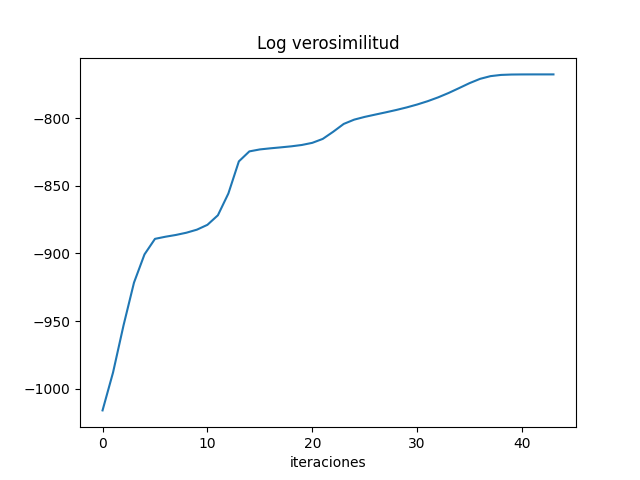

Text(0.5, 0, 'iteraciones')

In [45]:
f=np.load('data/data_4clusters_stretched.npz')
f.files
X_st = f['X_st']
y_st = f['y_st']
#log_vero, gammas, w, mus, sigmas = gmm_EM(X_st, k=4, max_iter=100, tol=0.001)
log_vero, gammas, w, mus, sigmas = gmm_EM(X_st, k=4, max_iter=100, tol=0.001, semilla=30)

plt.figure()
plt.plot(log_vero)
plt.title('Log verosimilitud')
plt.xlabel('iteraciones')

**Parte g)** Realice la asignación de clusters y compare los resultados con los obtenidos con el algoritmo *k-means*.

In [48]:
######################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   ########################
###################################################################################### 
# vector de tamaño N que almacena los clusters asignados a cada muestra 
print(mus)
N,d = X_st.shape

asignaciones_gmm = np.zeros(N)
asignaciones_gmm[:] = np.argmax(gammas,axis=1) 
   
######################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   ########################
###################################################################################### 

[[-5.47380564  5.27451178]
 [-0.68360896  1.51584218]
 [-1.95319375  1.4071426 ]
 [-3.14954505  3.70872408]]


<IPython.core.display.Javascript object>


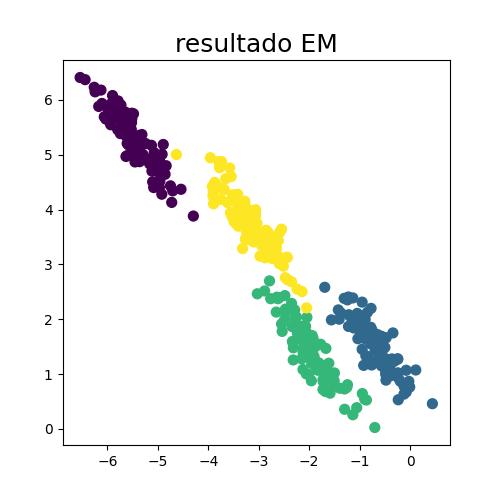

Text(0.5, 1.0, 'resultado EM')

In [47]:
# Se muestran con el mismo color los puntos pertenecientes al mismo cluster 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_st[:, 0], X_st[:, 1], c=asignaciones_gmm, s=dot_size, cmap=cmap)
plt.title('resultado EM', fontsize=18)